# Cross-Validation in Financial Machine Learning

The purpose of this notebook is twofold:

- Firstly, we outline the need for Time Series Cross Validation in the field of Financial Machine Learning.
- Then, we test the sklego scikit-learn-compatible [GroupTimesSeriesSplit](https://scikit-lego.netlify.app/crossvalidation.html#GroupTimeSeriesSplit) on the ADIA Lab Market Prediction Competition dataset.

## The need for Time Series Cross Validation in Financial Machine Learning 

Tabular time series cross-validation is a specialized technique used in machine learning and data analysis to evaluate the performance of predictive models on time series data organized in a tabular format. Unlike traditional cross-validation methods that randomly split the data into training and testing sets, tabular time series cross-validation takes into account the temporal ordering of the data. 

The importance of tabular time series cross-validation arises from the unique characteristics of time series data, where the order and timing of observations are crucial. In many real-world applications, such as finance, economics, and weather forecasting, the historical patterns and trends in the data play a significant role in making accurate predictions for the future. Traditional cross-validation methods may not be suitable for evaluating time series models as they can lead to data leakage and unrealistic performance estimates.

## Cross Validation in the ADIA Lab Market Prediction Competition

### Overview

This notebook focuses on GroupTimeSeriesSplit from sklego one of the already existing module dealing with time series cross validation.

GroupTimeSeriesSplit from sklego is a time series cross-validator that supports non-overlapping groups. Time series tasks in machine learning require special types of validation, because the time order of the objects is important for a fairer evaluation of an ML model’s quality.
Also, there can be different time units for splitting the data for different tasks - hours, days, months, ...

The onyl parameter that can me modified is *n_splits*, an integer which represents the number of splits. The calculation of the train and validation sets are done in such a way that the amount of observations per fold are as similar as possible. GroupTimeSeriesSplit from sklego only handles a rolling window.

See the [full documentation](https://scikit-lego.netlify.app/crossvalidation.html#GroupTimeSeriesSplit) for more details.

### Implementation

Below, we should a Cross Validation quickstarted on the ADIA Lab Market Prediction Competition dataset. In this section, the goal is to explain how GroupTimeSeriesSplit works.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm
tqdm.pandas()
from sklego.model_selection import GroupTimeSeriesSplit
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

### Loading the data
Let's take a look at the data. The data is from the first phase of ADIA Lab market prediction competition.

In [ ]:
!pip3 install crunch-cli --upgrade

In [ ]:
# import and instantiante the crunch package in this notebook
import crunch
crunch = crunch.load_notebook(__name__)

In [ ]:
!crunch --notebook setup curly-cedric --token dNC6peKScPoVCTssI27DJ8zzRHpLtu7otHINZa0uv5T12MiYjvWcYAnNJ27XkkHI
%cd curly-cedric

In [ ]:
# Getting the data
X, y, _ = crunch.load_data()

Let's merge X and y to have the complete dataset.

In [3]:
df = X.merge(y, on=['date', 'id'], how='inner')

Let's say we want to split the data into four folds.

The only parameter GroupTimeSeriesSplit expects is *n_splits* which controls the number of folds wanted for cross validation.

Another important parameter to specify is called *groups*. This is the parameter on which GroupTimesSeriesSplit will perform the split. For the split to take place correctly, *groups* must correspond to the column in the dataframe used as time unit. For ADIA Lab dataset, *groups* will be the column *date*.

In [4]:
CV = GroupTimeSeriesSplit(n_splits=4)

features = df.columns.drop(['y'])
target = ['date', 'id', 'y']

groups = X['date'].to_numpy()

for train_index, val_index in tqdm(CV.split(X, y, groups)):
    train_set = df.iloc[train_index]
    val_set = df.iloc[val_index]
    X_train, y_train = train_set[features], train_set[target]
    X_val, y_val = val_set[features], val_set[target]

  0%|          | 0/4 [00:00<?, ?it/s]

For the sake of readability, we will only print the features of the 5th fold.

In [5]:
X_train.tail()

,date,id,0,1,2,3,4,5,6,7,...,451,452,453,454,455,456,457,458,459,460
595406,230,0977f5a47ccac048220f6b034ba82c6507bd2c68d1f12e...,0.915736,-0.009873,0.227885,0.794135,1.398273,-0.522382,-0.446472,-0.002898,...,-2.202822,-1.440828,1.183228,1.823373,0.646298,-0.248723,0.601144,0.956986,-0.890538,0.810928
595407,230,34c2668acf702b2a14703c348bd26096114b1829fddbd2...,-0.057720,-0.783656,-0.290305,-0.740137,-0.941091,-0.299490,-1.190424,-1.086950,...,0.921004,-1.058998,0.317589,-0.146035,-0.277556,-1.151363,0.019373,0.142905,-1.511336,0.086593
595408,230,5ff27db43cd97e5b15af0e0647a89e8b5f8307a00ef334...,-0.488367,-0.410409,-0.850352,0.187171,-0.952577,0.194464,0.246688,0.758820,...,1.550771,-0.237884,-0.605789,1.193946,-0.452425,-0.234220,-0.177900,-0.535949,-0.977012,0.745278
595409,230,fadd62182f8ba0d77295e62043232792c66641a73afb64...,0.093536,-0.364950,0.831907,0.596220,1.584107,1.145510,-0.344829,-1.564130,...,1.143580,-0.108078,1.571716,0.905618,-0.526750,0.477192,0.632056,-0.078048,0.492667,-0.482480
595410,230,bbd324fe9ae9d15ce4ae38fe4d3088cf7f4b58df394af3...,-1.088501,1.188931,1.353126,-0.069721,0.646174,-0.330662,-0.413437,0.488905,...,-0.749659,-0.854367,1.434475,0.260351,-0.349109,-0.830712,0.187419,0.446949,-1.126225,1.590658


In [6]:
X_val.head()

,date,id,0,1,2,3,4,5,6,7,...,451,452,453,454,455,456,457,458,459,460
595411,231,a6809fee20392224e54b8450cd8b0e437d0cef77bd5da4...,-0.680147,1.260474,-0.453504,0.177937,-1.600160,1.314191,0.116122,-0.135393,...,0.540786,1.614841,-0.703755,0.745201,0.242272,-1.067609,-0.660520,-0.933815,-1.087864,0.375882
595412,231,c75e2ca85a6d30ba71523b686a82c117ba12c70da8348d...,0.424848,-2.181913,-1.124953,0.518796,-1.130703,-0.008386,1.129705,-0.214017,...,0.714138,2.942027,0.697394,-1.232427,-2.354766,-0.523435,0.136194,0.209052,0.073544,-0.355840
595413,231,a93992138e25bb217b65a99a5f651bdbc2ba26b0266cb2...,-0.254230,1.600029,-0.453175,-2.003238,0.256290,-0.426001,-0.175929,-0.820087,...,-0.935556,0.154621,-0.402665,-0.200069,0.028470,0.681284,0.096306,-1.471745,0.024057,1.164956
595414,231,583c4cce7934e652c01ca43600cdc54ae6695d1d71f342...,1.870631,1.084600,-0.445278,-0.949804,1.103963,-0.198156,-0.662312,-0.672722,...,1.150978,-1.040806,-1.171546,-0.387898,-0.142381,1.273763,0.107711,1.183794,-0.427609,-1.204504
595415,231,781f7c7897da7fb2db24b44a9735ab3dca227a9e49998b...,-0.135822,-1.043441,0.304029,0.609359,-0.325438,1.527977,-0.839068,0.931433,...,2.382727,0.855549,0.537741,1.068949,0.401399,-0.764428,1.069790,1.497228,-0.616554,-0.385112


In [7]:
X_train['date'].unique()

array([187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230])

In [8]:
X_val['date'].unique()

array([231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268])

We can see that the splitting is correctly done, indeed the training and the validation set do not overlap. However it is impossible to put an embargo with GroupTimeSeriesSPlit form sklego.

### Application of GroupTimeSeriesSplit in Supervised Learning

In this section, we will use GroupTimeSeriesSplit to perform Cross Validation on the ADIA Lab Market Prediction Competition data.

The model to generate the predictions is described as follows:
- preprocessing: as we are using a linear model with an mse loss function, models benefit from data being identically distributed: data are cross-sectionally Gaussianised.
- modeling: we perform a linear regression using scikit-learn for the training and the inference.

The performance of our model will nevertheless be assessed using the spearman rank correlation.

#### Preprocessing step

In [9]:
def gaussianise_df(x):
    nstocks = x.shape[0]
    x0 = np.linspace(-3, 3, nstocks)
    cdf_vector = norm.cdf(x0)
    xx = np.linspace(cdf_vector[0], cdf_vector[-1], nstocks)
    gx = norm.ppf(xx)
    gauss_xc = np.empty_like(gx)
    for c in x.columns[2:]:
        indices = np.argsort(x[c].values)
        gauss_xc[indices] = gx
        x[c] = gauss_xc
    return x

In [10]:
gauss_df = df.groupby('date', group_keys=False).progress_apply(lambda x: gaussianise_df(x))

  0%|          | 0/269 [00:00<?, ?it/s]

Let's compare the data before and after the transformation. The choice of the plotted features is purely random.

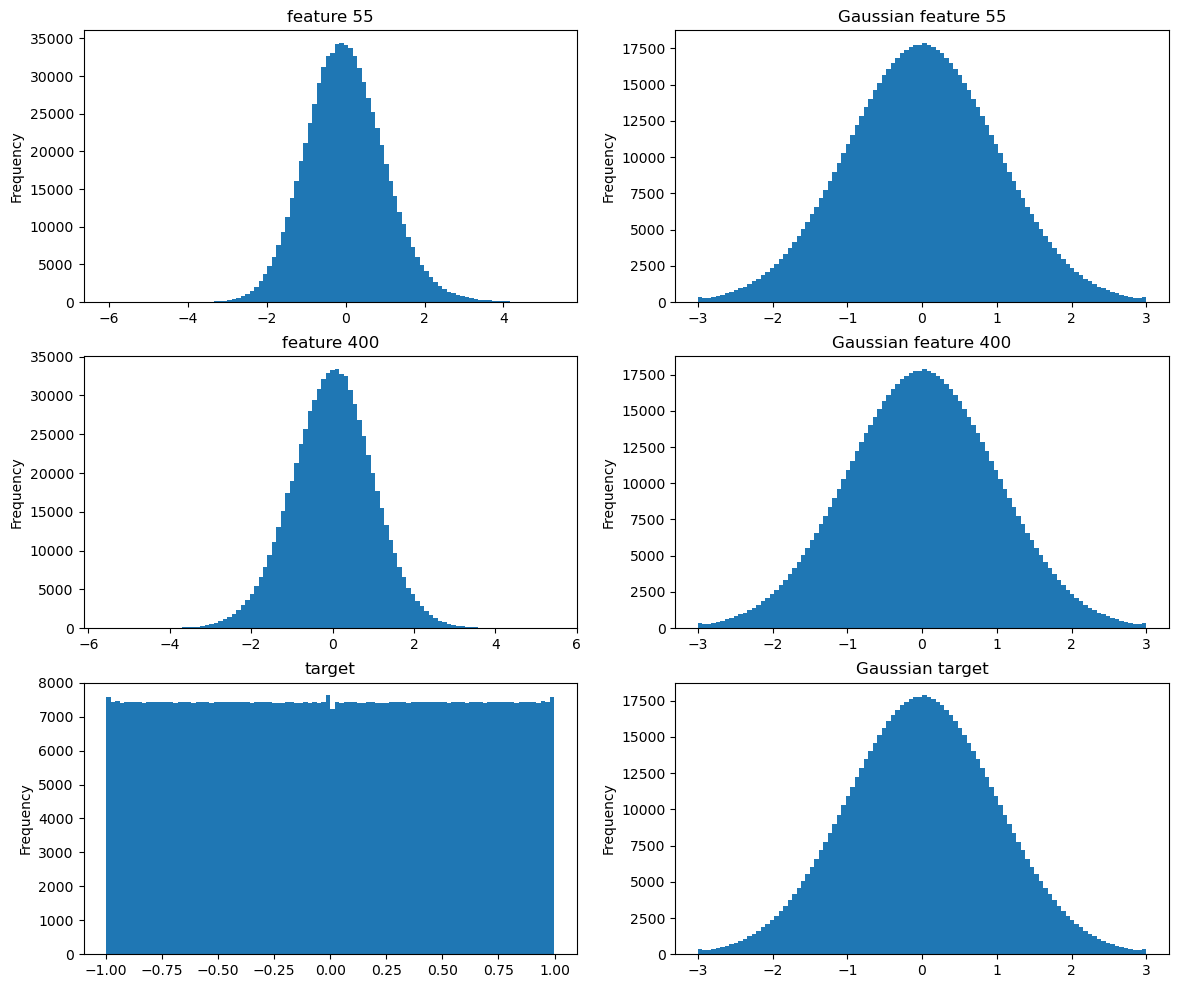

In [11]:
fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

df['55'].plot(kind='hist', bins=100, ax=ax1, title='feature 55')
gauss_df['55'].plot(kind='hist', bins=100, ax=ax2, title='Gaussian feature 55')
df['400'].plot(kind='hist', bins=100, ax=ax3, title='feature 400')
gauss_df['400'].plot(kind='hist', bins=100, ax=ax4, title='Gaussian feature 400')
df['y'].plot(kind='hist', bins=100, ax=ax5, title='target')
gauss_df['y'].plot(kind='hist', bins=100, ax=ax6, title='Gaussian target')

fig.show()

#### Prediction step
The following function takes as an input the predictions of the target, the actual target, val_refs which contains the *date* and *id* columns of the validation sets. It returns the spearman rank correlation for each date.

In [12]:
def get_spearman_results(preds, y_test, val_refs):
    preds.rename({f'{target}':f'pred_{target}' for target in preds.columns}, axis=1, inplace=True)
    preds_ref = pd.concat([preds.reset_index(drop=True), val_refs.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
    spearman = pd.DataFrame()
    
    target_suffixes = [col.split('_')[-1] for col in preds_ref.columns if 'pred' in col]
    for suffix in target_suffixes:
        spearman[f'target_{suffix}'] = preds_ref.groupby('date')[[f'pred_{suffix}', f'{suffix}']].corr(method='spearman').unstack().iloc[:,1]

    return spearman

The following function defines the linear model that we use to predict the target. It takes as input X_train, y_train, X_val, y_val, val_refs and the target. It returns the average spearman rank correlation over the validation set.

In [13]:
def linear_model(X_train, y_train, X_val, y_val, val_refs, target):
    model = LinearRegression(n_jobs=10, positive=False)
    model.fit(X_train, y_train[target])
    importance = model.coef_
    preds = pd.DataFrame(model.predict(X_val), columns=[target])
    spearman_results = get_spearman_results(preds, y_val, val_refs)

    return spearman_results.mean().values

The following function sets up the cross validation. It takes as input the arguments of GroupTimeSeriesSplit, the dataset, the features and the target. It returns the spearman rank correlation for each fold.

In [14]:
def cross_validation(n_splits, df, features, target):
    val_score = []
    CV = GroupTimeSeriesSplit(n_splits=n_splits)
    refs = df.iloc[:, :2]
    X = df[features]
    y = df[target]
    X = pd.concat([refs, X], axis=1)
    y = pd.concat([refs, y], axis=1)
    
    # creating the folds
    for train_index, val_index in tqdm(CV.split(X, y, groups)):
        train_set = df.iloc[train_index]
        val_set = df.iloc[val_index]
        X_train, y_train = train_set[features], train_set[target]
        X_val, y_val = val_set[features], val_set[target]
        val_refs = val_set.iloc[:, :2]
        
    # training and validation steps
        spearman_score = linear_model(X_train, y_train, X_val, y_val, val_refs, 'y')
        val_score.append(spearman_score*100)
    return val_score

We are going to run the cross validation with 4 splits.

In [15]:
n_split = 4
features = gauss_df.columns.drop(['id', 'date', 'y'])
target = ['y']

gauss_val_score = cross_validation(n_split, gauss_df, features, target)

  0%|          | 0/4 [00:00<?, ?it/s]

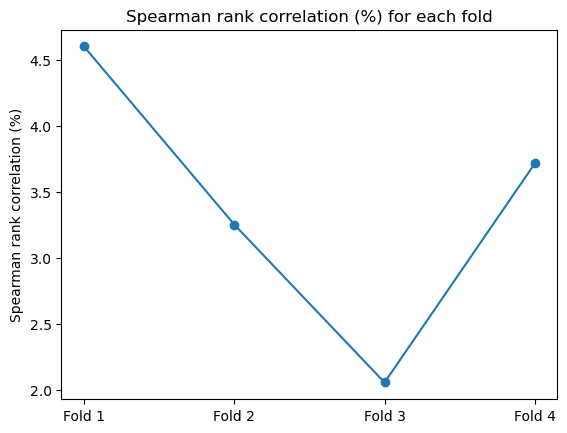

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

n_split = len(gauss_val_score)
x = [i for i in range(1, n_split+1)]
xticks = ['Fold {}'.format(i) for i in range(1, n_split+1)]
ax.plot(x, gauss_val_score, '-o')
ax.set_xticks(x, xticks)
ax.set_title('Spearman rank correlation (%) for each fold')
ax.set_ylabel('Spearman rank correlation (%)')
fig.show()

In [17]:
print("The spearman rank correlation mean over the folds is equal to {:.2f}".format(np.mean(gauss_val_score)))

The spearman rank correlation mean over the folds is equal to 3.41


The obtained results are quite good for such a simple model that does not take into account non-linearities.

## Conclusion

The purpose of this notebook is to demonstrate the need for a time series cross validator in Financial Machine Learning and to show how to apply it via an already existing library: GroupTimeSeriesSplit.

Even if GroupTimeSeriesSplit from sklego is an interesting module allowing its user to perform cross validation in a rolling window fashion, it possesses several flaws :
- The cross validation methodology is limited to a rolling window. It would be interesting to add an expanding window setting.
- The performance of the module needs to be improved. The splits are correctly made, but it takes a long time to create them.
- Some parameters are missing from the module. It would be interesting to be able to control the size of the test size and to be able to set an embargo [1] between the train and the validation set. 

## References

[1] López de Prado, Marcos. Advances in Financial Machine Learning. Wiley, 2018.

[2] Cross Validation — scikit-lego latest documentation. https://scikit-lego.netlify.app/crossvalidation.html#GroupTimeSeriesSplit. Last visited, 18th july 2023.